<center><h1> HDDM: Hierarchical Bayesian Estimation of the Drift Diffusion model</h1><p>
<h3>Thomas Wiecki</h3><p>
<h3>Former: PhD at Brown University on Computational Psychiatry</h3><p>
<h3>Current: Lead Data Scientist at Quantopian Inc.</h3>

## Contents

* Features
* Installation
* First model
* Group-wise conditions
* Trial-by-trial effects
* Outliers

## Why should you use it?

## Bayesian parameter estimation -> Posteriors over parameters.

## It's hierarchical.

<img src="graphical_hddm.svg"/>

## Informative priors based on literature

<img src="hddm_info_priors.svg"/>

## ... all lead to better parameter recovery

<img src="http://www.frontiersin.org/files/Articles/55610/fninf-07-00014-HTML/image_m/fninf-07-00014-g006.jpg">

## Other reasons
* Heavily optimized likelihoods for speed (minutes to couple of hours for complex models).
* Tuned samplers (slice sampling) for fast convergence.
* Trial-by-trial regressions allow estimation of influence of brain measures onto parameters.
* Free & Open-source (BSD license)
* Python (not Matlab)
* Good software engineering practices (unittests, continuous integration)

## It's Roger Ratcliff approved


"We found that the hierarchical diffusion method [as implemented by HDDM] performed very well, and is the method of choice when the number of observations is small."<br>

Roger Ratcliff, grandfather of the DDM, in a paper comparing all available tools to do DDM analysis. </center>

## Prof. James Rowe (Cambridge University)

"The HDDM modelling gave insights into the effects of disease that were simply not visible from a traditional analysis of RT/Accuracy. It provides a clue as to why many disorders including PD and PSP can give the paradoxical combination of akinesia and impulsivity. Perhaps of broader interest, the hierarchical drift diffusion model turned out to be very robust. In separate work, we have found that the HDDM gave accurate estimates of decision parameters with many fewer than 100 trials, in contrast to the hundreds or even thousands one might use for ‘traditional’ DDMs. This meant it was realistic to study patients who do not tolerate long testing sessions."

## Installation

* Install the Anaconda Python distribution from Continuum. Available for all platforms.
* Type: `conda install -c pymc hddm`

## First steps

In [1]:
%matplotlib inline

## Importing the modules

In [3]:
import pandas as pd # Input, output and process tabular data
import matplotlib.pyplot as plt # Plotting
import hddm # Our toolbox
print(hddm.__version__)

0.6.0


### Loading data from csv

In [4]:
!head cavanagh_theta_nn.csv

subj_idx,stim,rt,response,theta,dbs,conf
0,LL,1.21,1.0,0.65627512226100004,1,HC
0,WL,1.6299999999999999,1.0,-0.32788867166199998,1,LC
0,WW,1.03,1.0,-0.480284512399,1,HC
0,WL,2.77,1.0,1.9274273452399999,1,LC
0,WW,1.1399999999999999,0.0,-0.21323572605999999,1,HC
0,WL,1.1499999999999999,1.0,-0.43620365940099998,1,LC
0,LL,2.0,1.0,-0.27447891439400002,1,HC
0,WL,1.04,0.0,0.66695707371400004,1,LC
0,WW,0.85699999999999998,1.0,0.11861689909799999,1,HC


### We use the ``hddm.load_csv()`` function to load this file.

In [5]:
data = hddm.load_csv('./cavanagh_theta_nn.csv')

### This is what it looks like

In [6]:
data.head(12)

,subj_idx,stim,rt,response,theta,dbs,conf
0,0,LL,1.210,1,0.656275,1,HC
1,0,WL,1.630,1,-0.327889,1,LC
2,0,WW,1.030,1,-0.480285,1,HC
3,0,WL,2.770,1,1.927427,1,LC
4,0,WW,1.140,0,-0.213236,1,HC
5,0,WL,1.150,1,-0.436204,1,LC
6,0,LL,2.000,1,-0.274479,1,HC
7,0,WL,1.040,0,0.666957,1,LC
8,0,WW,0.857,1,0.118617,1,HC
9,0,WL,1.500,0,0.823626,1,LC


### Plotting RT distributions

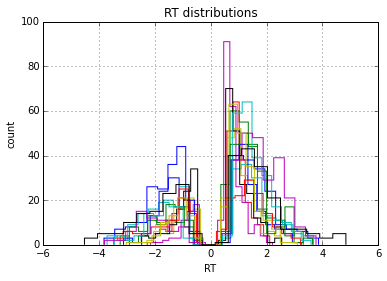

In [7]:
data = hddm.utils.flip_errors(data)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

### Fitting a hierarchical model

In [8]:
# Instantiate model object passing it our data (no need to call flip_errors() before passing it).
# This will tailor an individual hierarchical DDM around your dataset.
m = hddm.HDDM(data)

# find a good starting point which helps with the convergence.
m.find_starting_values()

# start drawing 2000 samples and discarding 20 as burn-in
m.sample(2000, burn=20)

 [-----------------100%-----------------] 2000 of 2000 complete in 474.7 sec

## Generating summary statistics

In [16]:
m.gen_stats()[['mean']]

,mean
a,2.0575
a_std,0.376146
a_subj.0,2.38334
a_subj.1,2.13225
a_subj.2,1.74836
a_subj.3,2.25216
a_subj.4,1.49291
a_subj.5,1.76831
a_subj.6,1.61111
a_subj.7,1.87703


## Plotting the posterior

Plotting a
Plotting a_std
Plotting v
Plotting t


/home/wiecki/miniconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


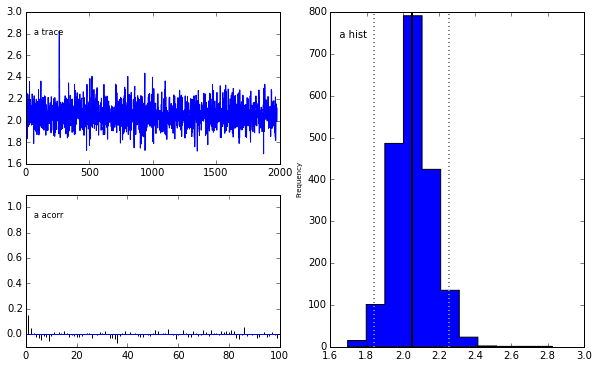

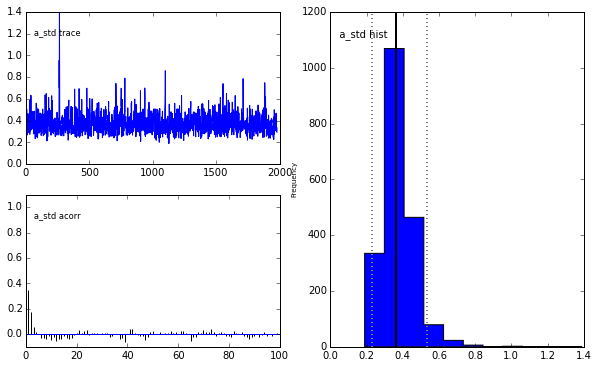

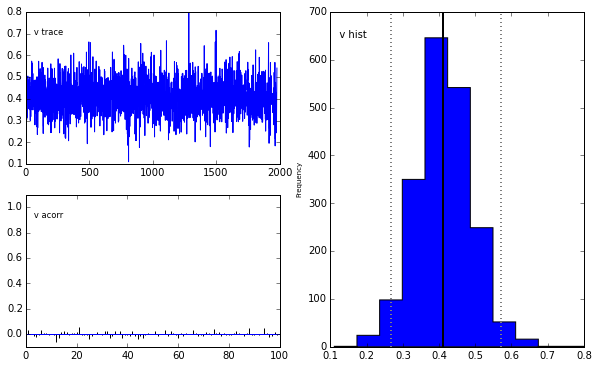

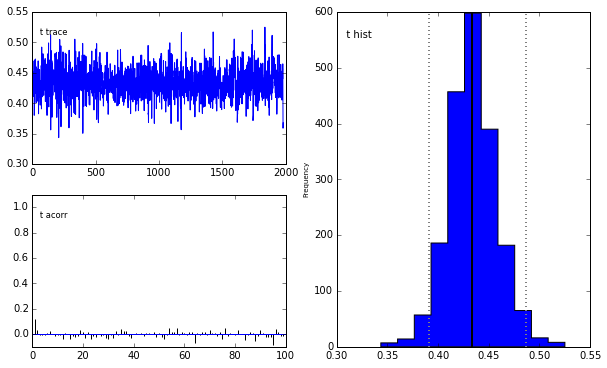

In [12]:
m.plot_posteriors(['a', 't', 'v', 'a_std'])

## How well does model fit data? -> Posterior predictive plot

/home/wiecki/miniconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


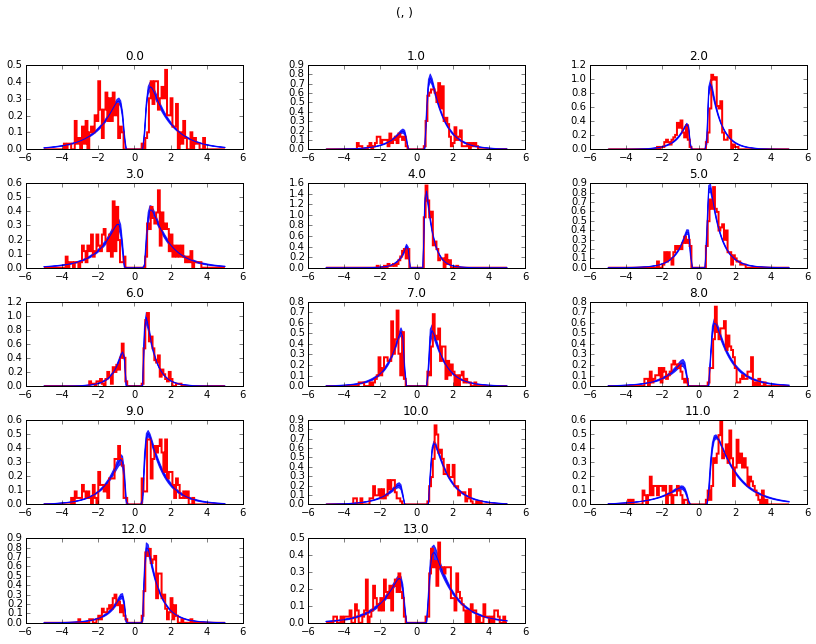

In [13]:
m.plot_posterior_predictive(figsize=(14, 10))

## Defining conditions with `depends_on`

In [14]:
m_stim = hddm.HDDM(data, depends_on={'v': 'stim'})
m_stim.find_starting_values()
m_stim.sample(10000, burn=1000)

 [-----------------100%-----------------] 10001 of 10000 complete in 2883.5 sec

## Comparing drift-rates across conditions

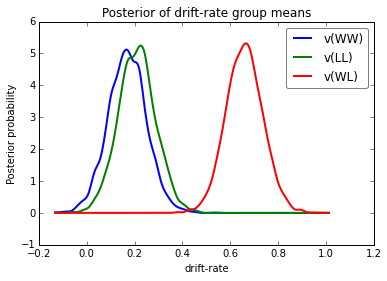

In [15]:
v_WW, v_LL, v_WL = m_stim.nodes_db.node[['v(WW)', 'v(LL)', 'v(WL)']]
hddm.analyze.plot_posterior_nodes([v_WW, v_LL, v_WL])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')

## Hypothesis testing

In [48]:
print("P(v_WW > v_LL) = {:.3f}%".format((v_WW.trace() > v_LL.trace()).mean() * 100))
print("P(v_LL > v_WL) = {:.3f}%".format((v_LL.trace() > v_WL.trace()).mean() * 100))

P(v_WW > v_LL) = 18.083%
P(v_LL > v_WL) = 0.000%


## Model comparison using DIC

* Deviance Information Criterion.
* Measure trading off model fit and model complexity.
* Not perfect but useful and easy to compute.
* Lower is better.

In [49]:
print("Lumped model DIC = %f" % m.dic)
print("Stimulus model DIC = %f" % m_stim.dic)

Lumped model DIC = 10960.528554
Stimulus model DIC = 10774.454785


## Model comparison using Posterior Predictive checks

* Generate data sets from model's posterior.
* Compare generated data sets to original data to assess if key patterns are reproduced by the model.
* See [http://ski.clps.brown.edu/hddm_docs/tutorial_post_pred.html](http://ski.clps.brown.edu/hddm_docs/tutorial_post_pred.html) for more detail of how to do this in HDDM.

## Within-subject effects

## Specify a glm using R-like syntax with `patsy`

In [52]:
from patsy import dmatrix
dmatrix("C(stim)", data.head(10))

DesignMatrix with shape (10, 3)
  Intercept  C(stim)[T.WL]  C(stim)[T.WW]
          1              0              0
          1              1              0
          1              0              1
          1              1              0
          1              0              1
          1              1              0
          1              0              0
          1              1              0
          1              0              1
          1              1              0
  Terms:
    'Intercept' (column 0)
    'C(stim)' (columns 1:3)

## Pass glm-descriptor to `HDDMRegressor`

In [16]:
m_within_subj = hddm.HDDMRegressor(data, "v ~ C(stim, Treatment('WL'))")

Adding these covariates:
['v_Intercept', "v_C(stim, Treatment('WL'))[T.LL]", "v_C(stim, Treatment('WL'))[T.WW]"]


In [17]:
m_within_subj.sample(5000, burn=200)

 [-----------------100%-----------------] 5000 of 5000 complete in 2068.6 sec

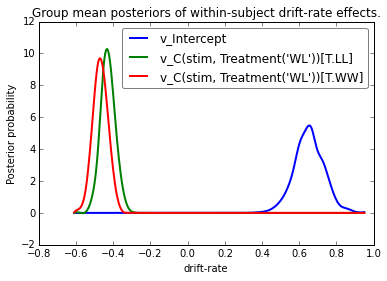

In [18]:
v_WL, v_LL, v_WW = m_within_subj.nodes_db.ix[["v_Intercept", 
                                              "v_C(stim, Treatment('WL'))[T.LL]", 
                                              "v_C(stim, Treatment('WL'))[T.WW]"], 'node']
hddm.analyze.plot_posterior_nodes([v_WL, v_LL, v_WW])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Group mean posteriors of within-subject drift-rate effects.')

## Fitting regression models

* Main effects of theta and dbs, as well as theta x dbs interaction.
* Within-subject effect of conflict on threshold.
* For more information, see http://ski.clps.brown.edu/papers/Cavanagh_DBSEEG.pdf

In [56]:
m_reg = hddm.HDDMRegressor(data, 
                           "a ~ theta*dbs + C(conf)",
                           depends_on={'v': 'stim'})

Adding these covariates:
['a_Intercept', 'a_C(conf)[T.LC]', 'a_theta', 'a_dbs', 'a_theta:dbs']


In [20]:
m_reg.sample(5000, burn=200)

 [-----------------100%-----------------] 5001 of 5000 complete in 3215.8 sec

P(a_theta < 0) =  0.0289583333333


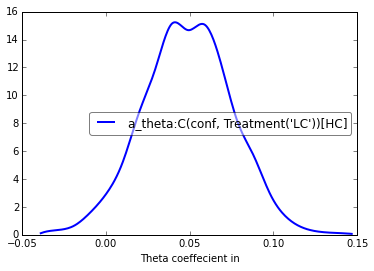

In [21]:
theta = m_reg.nodes_db.node["a_theta:C(conf, Treatment('LC'))[HC]"]
hddm.analyze.plot_posterior_nodes([theta], bins=20)
plt.xlabel('Theta coeffecient in ')
print("P(a_theta < 0) = ", (theta.trace() < 0).mean())

## Outliers are a fact of life

In [35]:
outlier_data, params = hddm.generate.gen_rand_data(params={'a': 2, 't': .4, 'v': .5}, 
                                                   size=200, n_fast_outliers=10)

In [36]:
m_no_outlier = hddm.HDDM(outlier_data)
m_no_outlier.sample(2000, burn=50)

 [-----------------100%-----------------] 2000 of 2000 complete in 7.2 sec

## Fit is strongly affected, especially by fast outliers

/home/wiecki/miniconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


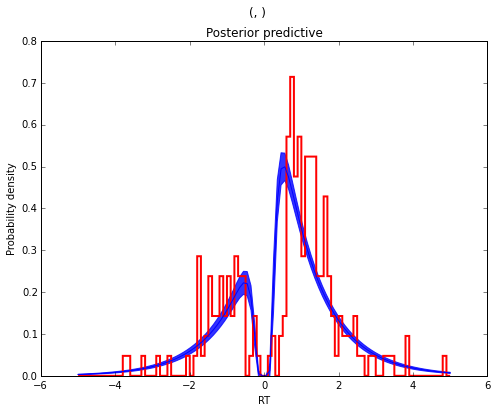

In [39]:
m_no_outlier.plot_posterior_predictive()
plt.title('Posterior predictive')
plt.xlabel('RT')
plt.ylabel('Probability density')

## Robustness to outliers with `p_outlier`

In [38]:
m_outlier = hddm.HDDM(outlier_data, p_outlier=.05)
m_outlier.sample(2000, burn=20)

 [-----------------100%-----------------] 2000 of 2000 complete in 7.0 sec

/home/wiecki/miniconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


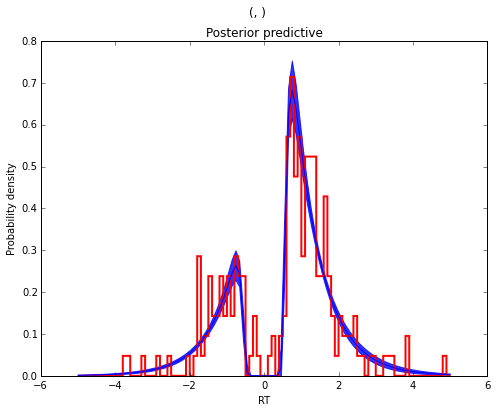

In [40]:
m_outlier.plot_posterior_predictive()
plt.title('Posterior predictive')
plt.xlabel('RT')
plt.ylabel('Probability density')

# Questions?

## Links

* Documentation: [http://ski.clps.brown.edu/hddm_docs/](http://ski.clps.brown.edu/hddm_docs/)
* Code: https://github.com/hddm-devs/hddm
* More info on posterior predictive checks: [http://ski.clps.brown.edu/hddm_docs/tutorial_post_pred.html](http://ski.clps.brown.edu/hddm_docs/tutorial_post_pred.html)